# Practica 1.

## Parte III.

Usa el conjunto de datos del fichero countries.csv disponible en el campus virtual y que se ha obtenido del repositorio [Kaggle](https://www.kaggle.com/noxmoon/world-countries-predicting-gdp).

En este caso, realizaremos una tarea de regresión donde cada elemento del conjunto de datos es un páis descrito por una serie de características sociales, económicas, geográficas y demográficas. La variable a predecir es el PIB del país (GDP en inglés de Gross Domestic Product).

0) Antes de empezar vamos a eliminar la variable “Region” del conjunto de datos, ya que no la usaremos para predecir.
   Además, utiliza la función dropna que elimina de un data frame todas las filas (es decir, observaciones) que tienen un valor perdido (na quiere decir not available) para alguna variable. De esta forma, no tendrás que preocuparte por imputar un valor a dichas observaciones.
   Asegúrate de que el dataframe resultante no tiene la variable Region, ni valores perdidos.

1) Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, especialmente a la matriz de gráficos de dispersión y al coeficiente de correlación de la variable objetivo (GDP) con el resto de variables. ¿Hay variables que tengan una relación clara con ella?

2) Establece un criterio en base al coeficiente de correlación para filtrar aquellas variables que tengan poca relación (ya sea directa o inversa) con la variable objetivo. Di qué variables pasan tu filtro y qué coeficiente de correlación tienen con ella.

3) Considera si debes normalizar o estandarizar las variables antes para usar un perceptrón multicapa de decisión. Razona tu elección.

4) Configura una validación cruzada con k=5 y dos perceptrones multicapa
   * MLP1 con una capa oculta de 200 neuronas
   * MLP2 con dos capas ocultas de 50 neuronas cada una
   
   Pinta la curva de aprendizaje para cada perceptrón variando el parámetro alpha que controla el aprendizaje del  perceptrón y determina el valor óptimo (es decir aquel que maximiza el Mean Square Error en negativo).
   Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).
   ¿Alguno de los dos perceptrones domina al otro? ¿Por qué crees que se producen las diferencias?

5) Entrena el perceptrón elegido con todo el conjunto de datos y genera las predicciones del GDP que hace el perceptrón para todo los países.
   A continuación, píntalas en un diagrama de dispersión frente a los valores observados para el GDP (en el eje Y) y pinta la recta que se genera con la predicción perfecta de todos los valores.
   Detecta países para los cuales el perceptrón a infraestimado más su GDP (aproximadamente). Idem con países donde se ha sobreestimado mucho su GDP. ¿Puedes aventurar alguna razón por la que esos países tienen más (o menos) GDP del que el perceptrón les asigna? ¿Es realmente un problema del perceptrón o eres capaz de ver alguna razón económica, política o social?


In [1]:
import pandas as pd

__0)__ Importamos los datos del fichero countries.csv que incluye observaciones de distintos países para variables como la población, tamaño del país, densidad de la población... En total se incluyen 20 variables de las cuales eliminaremos la de 'Region' ya que no se usará en las predicciones. También eliminamos las observaciones incompletas que tienen valores perdidos.
La variable a predecir es el GDP (USD per capita) en base a todos estos factores del país.

In [2]:
df = pd.read_csv("Datos/countries.csv")
df = df.set_index('Country')
df

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


In [3]:
df = df.drop(['Region'], axis=1) # Eliminar la columna Region
df = df.dropna() # Eliminar las observaciones que sean NaN
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


__1) Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, especialmente a la matriz de gráficos de dispersión y al coeficiente de correlación de la variable objetivo (GDP) con el resto de variables. ¿Hay variables que tengan
una relación clara con ella?__

In [4]:
df.dtypes # Nombre y tipo de las variables observadas

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP (USD per capita)                  float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

Tabla de descriptivos de cada variable.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,179.0,3.421415e+07,1.317639e+08,13477.000,1.188580e+06,6940432.000,2.086014e+07,1.313974e+09
Area (sq. mi.),179.0,5.641830e+05,1.395657e+06,28.000,1.991500e+04,118480.000,4.964410e+05,9.631420e+06
Pop. Density (per sq. mi.),179.0,2.948050e+02,1.379353e+03,1.800,2.680000e+01,66.900,1.647000e+02,1.618300e+04
Coastline (coast/area ratio),179.0,1.649520e+01,7.397760e+01,0.000,9.000000e-02,0.630,5.355000e+00,8.706600e+02
Net migration,179.0,-2.065363e-01,4.751216e+00,-20.990,-1.315000e+00,0.000,3.950000e-01,2.306000e+01
Infant mortality (per 1000 births),179.0,3.889816e+01,3.535300e+01,2.290,9.990000e+00,24.310,6.460500e+01,1.630700e+02
GDP (USD per capita),179.0,9.125698e+03,9.644123e+03,500.000,1.800000e+03,5100.000,1.295000e+04,3.780000e+04
Literacy (%),179.0,8.194413e+01,1.983754e+01,17.600,6.995000e+01,90.900,9.780000e+01,1.000000e+02
Phones (per 1000),179.0,2.081520e+02,2.101219e+02,0.200,2.710000e+01,137.100,3.350000e+02,8.980000e+02
Arable (%),179.0,1.400045e+01,1.315240e+01,0.000,3.675000e+00,10.530,2.000000e+01,6.211000e+01


__2) Establece un criterio en base al coeficiente de correlación para filtrar aquellas variables que tengan poca relación (ya sea directa o inversa) con la variable objetivo. Di qué variables pasan tu filtro y qué coeficiente de correlación tienen con ella.__

In [6]:
correl=df.corr()
correl[abs(correl['GDP (USD per capita)']) > 0.5]['GDP (USD per capita)']

Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Birthrate                            -0.658795
Agriculture                          -0.616919
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

__3) Considera si debes normalizar o estandarizar las variables antes para usar un perceptrón multicapa de decisión. Razona tu elección.__

Como hay rangos de muy diferentes entre las variables consideramos que se deben normalizar las variables antes de utilizar el perceptron multicapa.

In [7]:
from sklearn.preprocessing import StandardScaler

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(df)
data_scaled=scaler_x.transform(df)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
scaler_y.fit(df.get('GDP (USD per capita)').to_numpy().reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
target_scaled=scaler_y.transform(df.get('GDP (USD per capita)').to_numpy().reshape(-1, 1))

__4) Configura una validación cruzada con k=5 y dos perceptrones multicapa__

* __MLP1 con una capa oculta de 200 neuronas__

* __MLP2 con dos capas ocultas de 50 neuronas cada una__

__Pinta la curva de aprendizaje para cada perceptrón variando el parámetro alpha que controla el aprendizaje del perceptrón y determina el valor óptimo (es decir aquel que maximiza el Mean Square Error en negativo).
Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).
¿Alguno de los dos perceptrones domina al otro? ¿Por qué crees que se producen las
diferencias?__

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np


regul_param_range = 10.0 ** -np.arange(1, 7) 

cv_scores_mean=[]
cv_scores_std=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam',
                     alpha=regul_param, batch_size=100, learning_rate='constant',
                     learning_rate_init=0.001, max_iter=350, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())


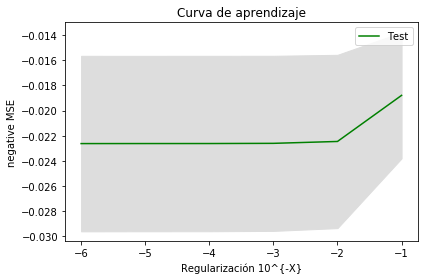

In [12]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos obsevar un comportamiento bastante estable para este parámetro. Cualquier valor entre $10^{-6}$ y $10^{-2}$ ofrece el mismo comportamiento en media y desviación típica.

## Red de 200 Neuronas

In [17]:
from sklearn.model_selection import cross_val_predict


regul_param=10**-2

mlp200=MLPRegressor(hidden_layer_sizes=(200, ),
                    activation='relu', 
                    solver='adam',
                    alpha=regul_param, 
                    batch_size=100, 
                    learning_rate='constant', 
                    learning_rate_init=0.001, 
                    max_iter=350, 
                    random_state=333)
    

predicts_scaled_200 = cross_val_predict(mlp200, data_scaled, target_scaled.ravel(), cv=5)


# escalamos las predicciones para que estén en la escala original
predicts_200 = scaler_y.inverse_transform(predicts_scaled_200)


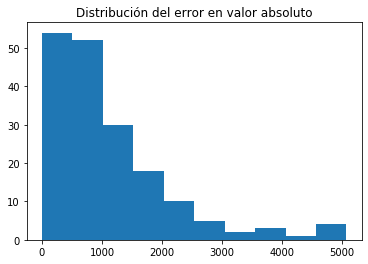

In [18]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(np.abs(df.get('GDP (USD per capita)') - predicts_200))  # np.abs(boston.target - predicts) es el error en cada ejemplo

plt.title('Distribución del error en valor absoluto')
plt.show()

Podemos observar que el error que presenta un error distribuido no mayor a 50 unidades y que se encuentra entre los valores de 0 y 1000.

## 2 redes de 50 neuronas

In [20]:
from sklearn.model_selection import cross_val_predict


regul_param=10**-2

mlp50 = MLPRegressor(hidden_layer_sizes=(2,50),
                     activation='relu',
                     solver='adam',
                     alpha=regul_param,
                     batch_size=100,
                     learning_rate='constant',
                     learning_rate_init=0.001,
                     max_iter=500,
                     random_state=333)
    

predicts_scaled_50 = cross_val_predict(mlp50, data_scaled, target_scaled.ravel(), cv=5)


# escalamos las predicciones para que estén en la escala original
predicts_50 = scaler_y.inverse_transform(predicts_scaled_50)


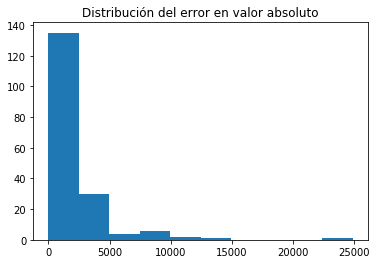

In [21]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(np.abs(df.get('GDP (USD per capita)') - predicts_50))  # np.abs(boston.target - predicts) es el error en cada ejemplo

plt.title('Distribución del error en valor absoluto')
plt.show()

Podemos observar que el error que presenta un error de 130 en los primeros valores,
el cual comparado a con la gráfica anterior podemos decir que es mucho peor ya que 
el error que presenta es casi 3 veces el valor de la anterior.

__5) Entrena el perceptrón elegido con todo el conjunto de datos y genera las predicciones del
GDP que hace el perceptrón para todo los países.
A continuación, píntalas en un diagrama de dispersión frente a los valores observados para el GDP (en el eje Y) y pinta la recta que se genera con la predicción perfecta de todos los valores.
Detecta países para los cuales el perceptrón a infraestimado más su GDP (aproximadamente). Idem con países donde se ha sobreestimado mucho su GDP.__

__¿Puedes aventurar alguna razón por la que esos países tienen más (o menos) GDP del que el perceptrón les asigna?__

__¿Es realmente un problema del perceptrón o eres capaz de ver alguna razón económica, política o social?__


Vistos los modelos anteriores hemos decido utilizar el modelo de una capa con 200 neuronas ya que el resultado permite estimar un valor con el menor error posible.

## Redes de 200 neuronas

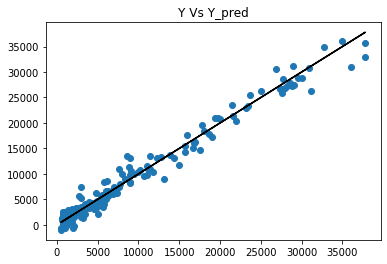

In [19]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df.get('GDP (USD per capita)'), predicts_200) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df.get('GDP (USD per capita)'), df.get('GDP (USD per capita)'), color='k') 

plt.title('Y Vs Y_pred')
plt.show()

## 2 redes de 50 neuronas

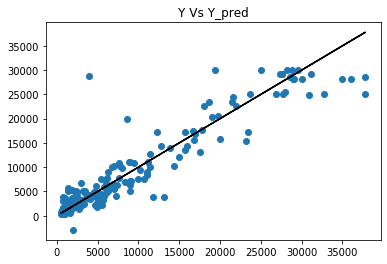

In [22]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df.get('GDP (USD per capita)'), predicts_50) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df.get('GDP (USD per capita)'), df.get('GDP (USD per capita)'), color='k') 

plt.title('Y Vs Y_pred')
plt.show()

Hemos decido mostrar las predicciones en ambos casos porque creemos que se ve claramente el error que se comete.